In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df = df[['location', 'town', 'mortality', 'hardness']]
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [4]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


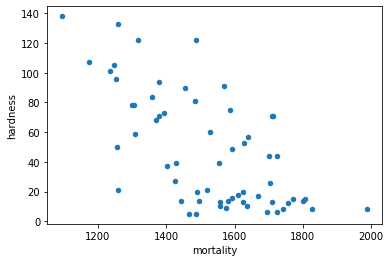

In [5]:
df.plot(kind='scatter', x='mortality', y='hardness');

In [111]:
df[['mortality', 'hardness']].corr()  #корелляция выше средней, обратная. Жесткость падает - здоровье лучше, и, наоборот.

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [112]:
df[['mortality', 'hardness']].corr(method='spearman') # эта корелляция точнее, отличается не сильно

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
X= df[['mortality']]
y= df[['hardness']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.coef_

array([[-0.12670202]])

In [9]:
model.intercept_

array([239.36784261])

In [10]:
y_pred = model.predict(X_test)
y_pred

array([[81.3704298 ],
       [41.96610311],
       [49.94833006],
       [23.72101293],
       [73.76830889],
       [33.4770681 ],
       [79.85000562],
       [38.29174467],
       [46.9074817 ],
       [24.48122503],
       [73.51490486],
       [51.21535021],
       [42.34620915],
       [11.30421546],
       [22.83409883],
       [58.43736507],
       [31.95664392],
       [10.41730135],
       [82.76415197]])

In [11]:
model.score(X_test, y_test) # коэффициент детерминации

0.4948982822876836

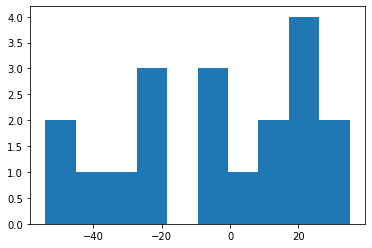

In [19]:
ypred = y_pred.tolist()
ytest = y_test.values.tolist()

new_pred = [int(i[0]) for i in ypred]
new_test = [int(i[0]) for i in ytest]

final = [new_test, new_pred]
df_ = pd.DataFrame(final).T
df_['val'] = df_[1] - df_[0]
plt.hist(df_['val'] );

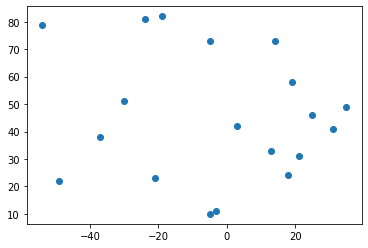

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df_['val'],df_[1])
plt.show()

In [21]:
df_south = df.loc[(df['location']  == 'South')]

In [22]:
df_south

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
18,South,East Ham,1318,122
19,South,Exeter,1260,21


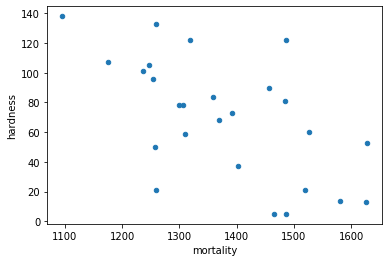

In [23]:
df_south.plot(kind='scatter', x='mortality', y='hardness');

In [63]:
df_south[['mortality', 'hardness']].corr()  # данных меньше и они однородны по признаку локации. корелляция меньше

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [64]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [24]:
X_south = df_south[['mortality']]
y_south = df_south[['hardness']]

In [25]:
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [26]:
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model_south.coef_

array([[-0.18112812]])

In [28]:
model_south.intercept_

array([324.11907462])

In [29]:
y_south_pred = model_south.predict(X_south_test)
y_south_pred

array([[85.39221138],
       [54.96268708],
       [98.25230796],
       [54.96268708],
       [70.17744923],
       [95.89764238],
       [87.02236446],
       [58.58524949]])

In [30]:
model_south.score(X_south_test, y_south_test)  # модель не предсказывает ничего вразумительного, потому что кооэффициент < 0 и на графике данные не похожи на линейную зависимость

-0.05226615794483824

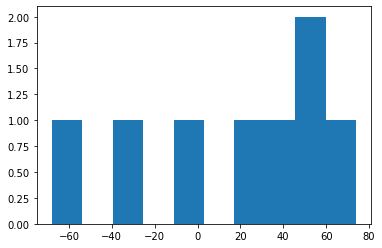

In [31]:
ypred = y_south_pred.tolist()
ytest = y_south_test.values.tolist()

new_pred = [int(i[0]) for i in ypred]
new_test = [int(i[0]) for i in ytest]

final = [new_test, new_pred]
df_ = pd.DataFrame(final).T
df_['val'] = df_[1] - df_[0]
plt.hist(df_['val'] );

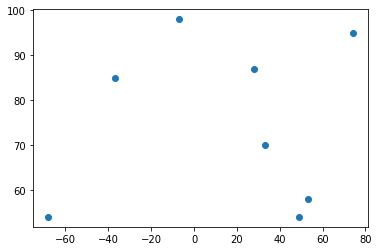

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df_['val'],df_[1])
plt.show()

In [33]:
df_north = df.loc[(df['location']  == 'North')]
df_north

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
8,North,Bradford,1637,10
11,North,Burnley,1755,12
15,North,Darlington,1491,20
16,North,Derby,1555,39
17,North,Doncaster,1428,39


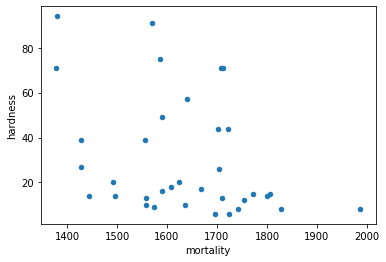

In [34]:
df_north.plot(kind='scatter', x='mortality', y='hardness');

In [79]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [80]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [35]:
X_north = df_north[['mortality']]
y_north = df_north[['hardness']]

In [36]:
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)

In [37]:
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
model_north.coef_

array([[-0.09774218]])

In [39]:
model_north.intercept_

array([191.72797679])

In [40]:
y_north_pred = model_north.predict(X_north_test)
y_north_pred

array([[-2.48573411],
       [37.88178607],
       [50.58826942],
       [23.22045913],
       [36.22016902],
       [24.29562311],
       [25.37078708],
       [21.4610999 ],
       [39.73888749],
       [18.52883451],
       [52.1521443 ]])

In [41]:
model_north.score(X_north_test, y_north_test) # модель не предсказывает ничего вразумительного, потому что кооэффициент < 0 и на графике данные не похожи на линейную зависимость

-0.34863672627416675

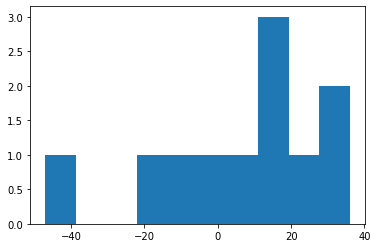

In [42]:
ypred = y_north_pred.tolist()
ytest = y_north_test.values.tolist()

new_pred = [int(i[0]) for i in ypred]
new_test = [int(i[0]) for i in ytest]

final = [new_test, new_pred]
df_ = pd.DataFrame(final).T
df_['val'] = df_[1] - df_[0]
plt.hist(df_['val'] );

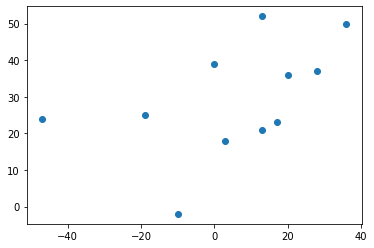

In [43]:
import matplotlib.pyplot as plt
plt.scatter(df_['val'],df_[1])
plt.show()                      # мне кажется, есть закономерность: линейное направление с большим разбросом